##Daniel Enciso
##CA05-A Logistic Regression


In [196]:
# import packages 
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

##Data Source and Quality Analysis

In [197]:
#Accessing the data we will be working with:
data = pd.read_csv('https://github.com/ArinB/CA05-B-Logistic-Regression/raw/master/cvd_data.csv')

In [198]:
#Confirming the column/row count
data.shape

(3242, 17)

In [199]:
#Viewing the first five rows of our dataset
data.head()

,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
0,0,54,1,2,1,110.0,40.0,108.0,87.5,34.0,0,1,0,1,2,3,4
1,0,56,3,2,1,113.0,34.0,107.0,83.5,0.0,0,0,0,2,2,1,3
2,0,54,1,3,1,110.0,44.5,105.0,86.2,49.5,0,0,0,3,2,6,4
3,0,54,1,3,1,129.0,42.5,110.0,89.1,0.0,0,0,0,3,2,1,3
4,0,51,3,2,1,122.0,37.0,113.0,81.3,0.0,0,0,0,2,1,1,2


In [200]:
data.describe()

,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
count,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000
mean,0.590068,64.828809,1.094695,2.326342,1.368600,105.404832,37.550719,97.209904,82.945928,12.904010,0.430907,0.327884,0.067551,2.473782,2.281308,4.292721,3.864898
std,0.491897,10.400496,0.358237,0.697934,0.933871,10.280402,4.101003,13.598060,7.849650,20.156736,1.242444,0.469515,0.251012,0.672158,0.951695,1.021099,0.614247
min,0.000000,39.000000,1.000000,1.000000,1.000000,44.000000,25.000000,67.000000,57.400000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,57.000000,1.000000,2.000000,1.000000,99.000000,34.425000,88.000000,78.200000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,4.000000,4.000000
50%,1.000000,65.000000,1.000000,2.000000,1.000000,104.000000,37.150000,97.000000,82.550000,0.300000,0.000000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
75%,1.000000,73.000000,1.000000,3.000000,1.000000,110.000000,40.500000,106.000000,86.575000,20.475000,0.000000,1.000000,0.000000,3.000000,3.000000,5.000000,4.000000
max,1.000000,90.000000,3.000000,4.000000,8.000000,168.000000,53.000000,135.000000,136.700000,170.500000,30.000000,1.000000,1.000000,3.000000,6.000000,6.000000,5.000000


In [201]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3242 entries, 0 to 3241
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cvd_4types    3242 non-null   int64  
 1   age_s1        3242 non-null   int64  
 2   race          3242 non-null   int64  
 3   educat        3242 non-null   int64  
 4   mstat         3242 non-null   int64  
 5   hip           3242 non-null   float64
 6   neck20        3242 non-null   float64
 7   waist         3242 non-null   float64
 8   av_weight_kg  3242 non-null   float64
 9   cgpkyr        3242 non-null   float64
 10  tea15         3242 non-null   int64  
 11  srhype        3242 non-null   int64  
 12  parrptdiab    3242 non-null   int64  
 13  bend25        3242 non-null   int64  
 14  happy25       3242 non-null   int64  
 15  tired25       3242 non-null   int64  
 16  hlthlm25      3242 non-null   int64  
dtypes: float64(5), int64(12)
memory usage: 430.7 KB


##Part 1:
Build a binary classifier model to predict the CVD Risk (Yes/No, or 1/0) using a Logistic Regression Model with the best performance possible

In [202]:
#Display the columns to determine which we will need
data.columns

Index(['cvd_4types', 'age_s1', 'race', 'educat', 'mstat', 'hip', 'neck20',
       'waist', 'av_weight_kg', 'cgpkyr', 'tea15', 'srhype', 'parrptdiab',
       'bend25', 'happy25', 'tired25', 'hlthlm25'],
      dtype='object')

In [203]:
#We are splitting our dataset into the test and train data

col = [[ 'age_s1', 'race', 'educat', 'mstat', 'hip', 'neck20',
 'waist', 'av_weight_kg', 'cgpkyr', 'tea15', 'srhype', 'parrptdiab',
 'bend25', 'happy25', 'tired25', 'hlthlm25']]

X = data[[ 'age_s1', 'race', 'educat', 'mstat', 'hip', 'neck20',
 'waist', 'av_weight_kg', 'cgpkyr', 'tea15', 'srhype', 'parrptdiab',
 'bend25', 'happy25', 'tired25', 'hlthlm25']]
y = data['cvd_4types']

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [204]:
print(X.shape)
print(y.shape)

(3242, 16)
(3242,)


In [205]:
#Train the Logistic Regression classifier
m = LogisticRegression(C=1e40, solver='newton-cg', random_state=0)
fitted_model = m.fit(X_train, y_train)

In [207]:
#Using the score method to get the accuracy of the model
print("Accuracy: ", m.score(X_test,y_test))

Accuracy:  0.6818742293464858


##Part 2: 
Display the Feature Importance of all the features sorted in the order of decreasing influence on
the CVD Risk

In [208]:
m.fit(X / np.std(X, 0),y)
print(m.coef_)

[[ 7.29048816e-03 -3.72386647e-01  1.83014732e-01 -1.37113159e-01
  -6.09559730e-01 -1.85504126e-01  1.13662808e+00 -2.35567505e-01
   3.85735531e-04 -6.67102966e-02  7.28744393e-02  1.59857581e-01
   8.84047420e-02 -8.35144736e-02  1.17775527e-01 -3.63241660e-01]]


In [209]:
#A higher value of the Coefficients will imply larger influence of the corresponding 
#features on the Outcome (Target Variable)

coef_table = pd.DataFrame(abs(m.coef_), columns= col).transpose().sort_values(by=0,ascending=False)
coef_table.rename(columns={0: "coef"},inplace=True)

coef_table

,coef
waist,1.136628
hip,0.609560
race,0.372387
hlthlm25,0.363242
av_weight_kg,0.235568
neck20,0.185504
educat,0.183015
parrptdiab,0.159858
mstat,0.137113
tired25,0.117776


##Part 3: 
Evaluate the performance of your model (including ROC Curve), explain the performance and
draw a meaningful conclusion.

In [210]:
#Accuracy score
y_pred = m.predict(x_test)
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.6091245376078915


In [211]:
#Calculating the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[  3 314]
 [  3 491]]


In [212]:
#Generating classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.01      0.02       317
           1       0.61      0.99      0.76       494

    accuracy                           0.61       811
   macro avg       0.55      0.50      0.39       811
weighted avg       0.57      0.61      0.47       811



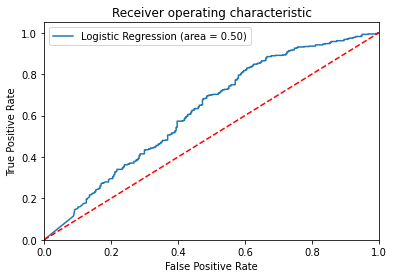

In [213]:
logit_roc_auc = roc_auc_score(y_test, m.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, m.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend()
plt.show()